# Fragrance cluster analysis

# Table of contents

1. Data exploration
2. Choosing the right number of clusters <br>
   2.1. Elbow method <br>
   2.2. Silhouette coefficient <br>
   2.3. Calinski Harabasz score
3. Four fragrance clusters
4. Six fragrance clusters
5. Seven fragrance clusters
6. Eight fragrance clusters
7. Fourteen fragrance clusters
8. Hierarchical clustering

## Key objective

- Fragrances should be grouped into clusters. Objects in the same cluster are to be more similar to each other than to objects in other clusters.
- Define the main scent family for each fragrance. To do this, different approaches based on business rules should be used.

## 1. Data exploration

In [1]:
# import Python libraries
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# open the csv file
df = pd.read_csv('perfume.csv')
pd.options.display.max_columns = None
df.head()

,brand,title,date,accords,rating_score,votes,longevity_poor,longevity_weak,longevity_moderate,longevity_long,longevity_very_long,sillage_soft,sillage_moderate,sillage_heavy,sillage_enormous,clslove,clslike,clsdislike,clswinter,clsspring,clssummer,clsautumn,clscold,clshot,clsday,clsnight,clslove_female25under,clslove_male25under,clslove_female25older,clslove_male25older,clslike_female25under,clslike_male25under,clslike_female25older,clslike_male25older,clsdislike_female25under,clsdislike_male25under,clsdislike_female25older,clsdislike_male25older,clswinter_female25under,clswinter_male25under,clswinter_female25older,clswinter_male25older,clsspring_female25under,clsspring_male25under,clsspring_female25older,clsspring_male25older,clssummer_female25under,clssummer_male25under,clssummer_female25older,clssummer_male25older,clsautumn_female25under,clsautumn_male25under,clsautumn_female25older,clsautumn_male25older,clsday_female25under,clsday_male25under,clsday_female25older,clsday_male25older,clsnight_female25under,clsnight_male25under,clsnight_female25older,clsnight_male25older,Ihaveit,Ihadit,Iwantit,notes_1,notes_2,notes_3,notes_4,notes_5,notes_6,notes_7,notes_8,notes_9,notes_10,notes_11,notes_12,notes_13,notes_14,notes_15,notes_16,notes_17,notes_18,notes_19,notes_20,gender
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,"woody,earthy,animalic,amber,musky,balsamic",5.0,3,0,0,0,0,3,0,1,0,3,100,1,1,50,50,50,50,0,0,50,50,1,1,1,100,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,3.0,0.0,0.0,Top1Bulgarian Rose,Top2Bergamot,Top3Fruits,Top4Agarwood (Oud),Middle0Sandalwood,Middle1Agarwood (Oud),Middle2Cypriol Oil or Nagarmotha,Middle3Benzoin,Base0Amber,Base1Castoreum,Base2Civet,Base3Moss,Base4Agarwood (Oud),Base5Indian Oud,NaN,NaN,NaN,NaN,NaN,NaN,women
1,Ajmal,Aatifa Ajmal for women and men,2014,"fresh spicy,woody,musky,rose,amber",4.2,10,1,0,0,0,5,0,0,3,3,100,80,20,100,60,60,60,0,0,80,80,1,1,60,40,1,1,80,1,1,1,20,1,1,1,80,20,1,1,40,20,1,1,60,1,1,1,60,1,1,1,60,20,1,1,60,20,8.0,0.0,0.0,Top1Rose,Top2Cumin,Middle0Amber,Middle1Woody Notes,Base0Musk,Base1Amber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,"rose,woody,musky,oud,fruity",0.0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.0,0.0,3.0,Top1Rose,Top2Sandalwood,Top3Apple,Top4Agarwood (Oud),Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for w...,2010,"white floral,green,ozonic,fresh,animalic",0.0,1,0,0,0,0,0,0,0,0,0,1,1,1,1,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,0.0,0.0,1.0,Top1Green Tea,Top2White Flowers,Top3Ozonic notes,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,"woody,warm spicy,amber,balsamic,musky",0.0,2,0,0,0,0,2,0,2,0,0,1,1,1,100,100,100,100,0,0,100,100,1,1,1,1,1,1,1,1,1,1,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,1,100,1,1,0.0,0.0,2.0,Top1Amber,Top2Sandalwood,Top3Floral Notes,Top4Vetiver,Top5Saffron,Middle0nan,Base0nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,women


In [3]:
# display all columns
my_list = list(df)
my_list

['brand',
 'title',
 'date',
 'accords',
 'rating_score',
 'votes',
 'longevity_poor',
 'longevity_weak',
 'longevity_moderate',
 'longevity_long',
 'longevity_very_long',
 'sillage_soft',
 'sillage_moderate',
 'sillage_heavy',
 'sillage_enormous',
 'clslove',
 'clslike',
 'clsdislike',
 'clswinter',
 'clsspring',
 'clssummer',
 'clsautumn',
 'clscold',
 'clshot',
 'clsday',
 'clsnight',
 'clslove_female25under',
 'clslove_male25under',
 'clslove_female25older',
 'clslove_male25older',
 'clslike_female25under',
 'clslike_male25under',
 'clslike_female25older',
 'clslike_male25older',
 'clsdislike_female25under',
 'clsdislike_male25under',
 'clsdislike_female25older',
 'clsdislike_male25older',
 'clswinter_female25under',
 'clswinter_male25under',
 'clswinter_female25older',
 'clswinter_male25older',
 'clsspring_female25under',
 'clsspring_male25under',
 'clsspring_female25older',
 'clsspring_male25older',
 'clssummer_female25under',
 'clssummer_male25under',
 'clssummer_female25older',

In [85]:
# select columns for further analysis
df1 = df[['brand', 'title', 'date', 'gender', 'votes', 'rating_score', 'accords']]
df1.head()

,brand,title,date,gender,votes,rating_score,accords
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,3,5.0,"woody,earthy,animalic,amber,musky,balsamic"
1,Ajmal,Aatifa Ajmal for women and men,2014,women,10,4.2,"fresh spicy,woody,musky,rose,amber"
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,0,0.0,"rose,woody,musky,oud,fruity"
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,1,0.0,"white floral,green,ozonic,fresh,animalic"
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,2,0.0,"woody,warm spicy,amber,balsamic,musky"


In [5]:
# basic characteristics
df1.describe()

,date
count,51212.000000
mean,1526.492775
std,867.219020
min,0.000000
25%,1900.000000
50%,2009.000000
75%,2015.000000
max,9459.000000


In [6]:
# find length of longest string in Pandas dataframe
df1['accords'].str.len().max()
# set column width in dataframe
pd.options.display.max_colwidth = 76

In [7]:
# show the first 5 rows
df1.head()

,brand,title,date,gender,accords
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky,balsamic"
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber"
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity"
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic"
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky"


In [8]:
# show the last 5 rows
df1.tail()

,brand,title,date,gender,accords
51207,Maitre-Parfumeur-et-Gantier,Oud Extravagant Maitre Parfumeur et Gantier for women and men,2018,women,"balsamic,oud,aromatic,fresh spicy,vanilla,smoky,Pictures"
51208,Como-Lake,Silenzio Como Lake for women and men,2018,women,"woody,musky,aromatic,amber,white floral,citrus,Pictures"
51209,Battistoni,Marte Red Planet Battistoni for men,0,NaN,"aromatic,green,citrus,woody,fresh spicy,amber,Pictures"
51210,12-Parfumeurs-Francais,Versailles 12 Parfumeurs Francais for women and men,2015,women,"warm spicy,woody,citrus,fruity,sweet"
51211,OPSObjects,Ops! Love OPSObjects for women,2015,women,"floral,citrus,fresh,aromatic,patchouli,musky,Pictures"


In [9]:
# group by gender
df1['gender'].value_counts()

women     39761
man         850
unisex      122
Name: gender, dtype: int64

In [10]:
# count all rows
df1['gender'].count()

40733

In [11]:
df1.loc[df1['brand']=='Chanel'].head()

,brand,title,date,gender,accords
1881,Chanel,Chance Parfum Chanel for women,2003,women,"powdery,white floral,vanilla,musky,floral"
3620,Chanel,Chance Eau Tendre Chanel for women,2010,women,"floral,fruity,citrus,sweet,fresh spicy,white floral,Videos,Pictures"
3623,Chanel,Chance Eau de Toilette Chanel for women,2003,women,"patchouli,green,citrus,sweet,earthy,musky"
3635,Chanel,Chanel N°5 Eau Premiere Chanel for women,2007,women,"woody,aldehydic,white floral,yellow floral,vanilla,Videos,Pictures"
3642,Chanel,Allure Homme Edition Blanche Chanel for men,2008,NaN,"citrus,aromatic,woody,green,vanilla,Pictures"


In [12]:
# display top 20 brands
df1['brand'].value_counts().head(10)

Avon                 786
Guerlain             395
Zara                 331
Demeter-Fragrance    329
Victoria-s-Secret    314
O-Botic-rio          297
Oriflame             290
Natura               275
DSH-Perfumes         264
Ajmal                243
Name: brand, dtype: int64

### Accord of a perfume

An accord is a combination of several notes (e.g. rose, chypre, amber).

Fragrances can be classified into one various types, although there is a lot of overlap. Most scents contain notes from more than one family.

The most dominant notes in the fragrance determines the scent category.

In [13]:
# split accords column into separate columns
df2 = df1['accords'].str.split(",", n = 6, expand = True)
df2.tail()

,0,1,2,3,4,5,6
51207,balsamic,oud,aromatic,fresh spicy,vanilla,smoky,Pictures
51208,woody,musky,aromatic,amber,white floral,citrus,Pictures
51209,aromatic,green,citrus,woody,fresh spicy,amber,Pictures
51210,warm spicy,woody,citrus,fruity,sweet,None,None
51211,floral,citrus,fresh,aromatic,patchouli,musky,Pictures


In [14]:
# create new accords_ clean column by extracting top five accords
df2['accords_'] = df2[df2.columns[0:5]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1
)
df2.tail()

,0,1,2,3,4,5,6,accords_
51207,balsamic,oud,aromatic,fresh spicy,vanilla,smoky,Pictures,"balsamic,oud,aromatic,fresh spicy,vanilla"
51208,woody,musky,aromatic,amber,white floral,citrus,Pictures,"woody,musky,aromatic,amber,white floral"
51209,aromatic,green,citrus,woody,fresh spicy,amber,Pictures,"aromatic,green,citrus,woody,fresh spicy"
51210,warm spicy,woody,citrus,fruity,sweet,None,None,"warm spicy,woody,citrus,fruity,sweet"
51211,floral,citrus,fresh,aromatic,patchouli,musky,Pictures,"floral,citrus,fresh,aromatic,patchouli"


In [15]:
# merge two dataframes by index
result = df1.join(df2)
result = result[['brand', 'title', 'date', 'gender', 'accords_']]
result.tail()

,brand,title,date,gender,accords_
51207,Maitre-Parfumeur-et-Gantier,Oud Extravagant Maitre Parfumeur et Gantier for women and men,2018,women,"balsamic,oud,aromatic,fresh spicy,vanilla"
51208,Como-Lake,Silenzio Como Lake for women and men,2018,women,"woody,musky,aromatic,amber,white floral"
51209,Battistoni,Marte Red Planet Battistoni for men,0,NaN,"aromatic,green,citrus,woody,fresh spicy"
51210,12-Parfumeurs-Francais,Versailles 12 Parfumeurs Francais for women and men,2015,women,"warm spicy,woody,citrus,fruity,sweet"
51211,OPSObjects,Ops! Love OPSObjects for women,2015,women,"floral,citrus,fresh,aromatic,patchouli"


## 2. Choosing the right number of clusters

In [16]:
# vectorize the text - convert the string to numeric
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(result['accords_'].values.astype('U'))

### 2.1. Elbow method

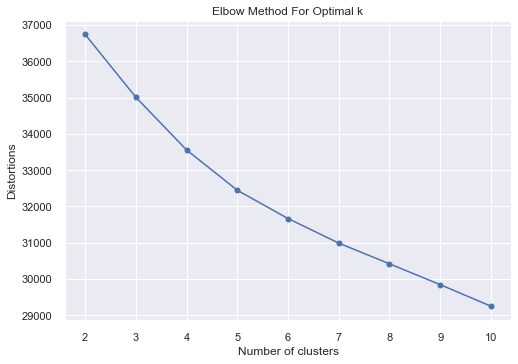

In [17]:
# elbow method for optimal number of clusters
# the scoring parameter metric is set to distortion
# distortion computes the sum of squared distances from each point to its assigned center
# the chart is quite smooth, it does not have a distinct elbow
distortions = []

for i in range(2,11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(2,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortions')
plt.title('Elbow Method For Optimal k')
plt.show()

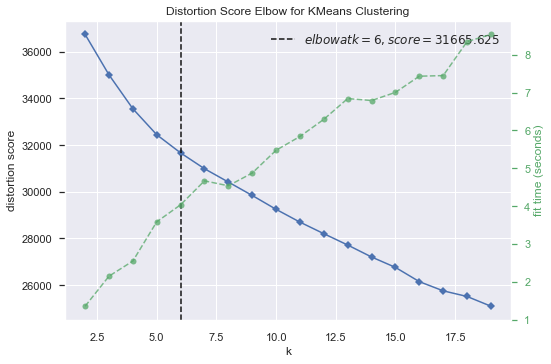

In [18]:
# elbow method for K means
model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20), timings= True)
visualizer.fit(X)         
visualizer.poof(); 

### 2.2. Silhouette coefficient

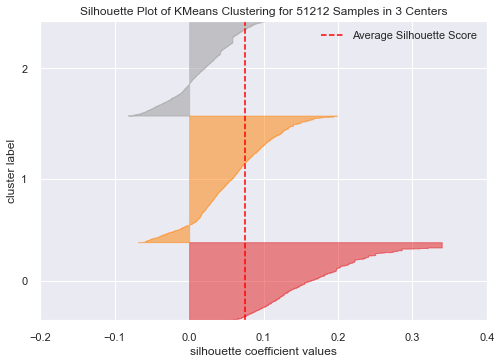

In [19]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

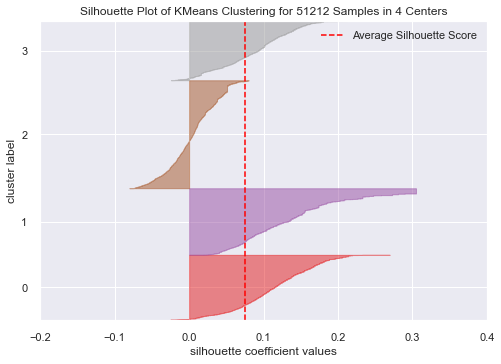

In [20]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

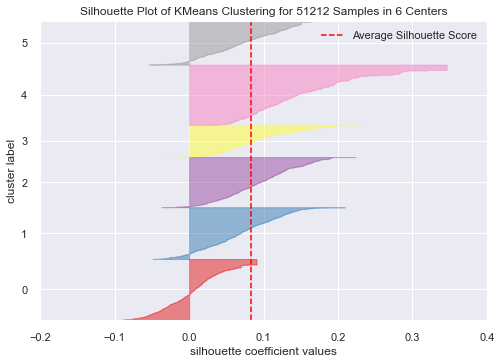

In [21]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=6, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

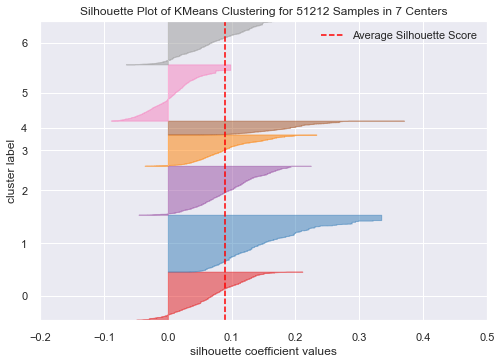

In [22]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=7, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();  

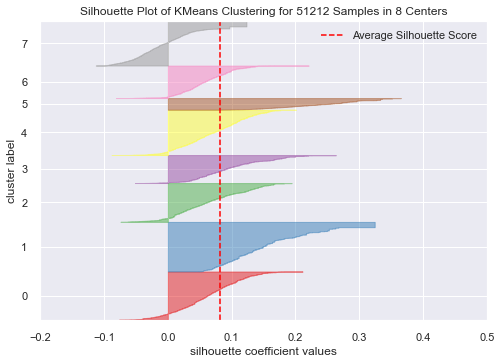

In [23]:
# silhouette analysis for optimal number of clusters
model = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(X)    
visualizer.poof();   

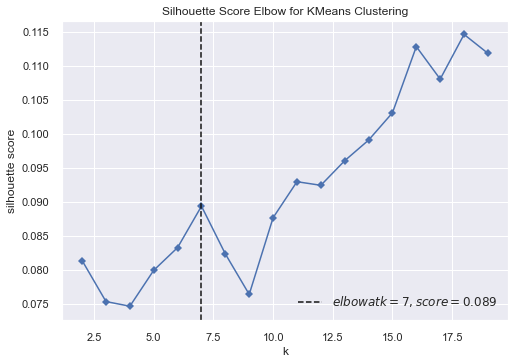

In [24]:
# silhouette score for K means
model = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
visualizer = KElbowVisualizer(model, k=(2,20),metric='silhouette', timings= False)
visualizer.fit(X)      
visualizer.poof();  

### 2.3. Calinski Harabasz score

/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


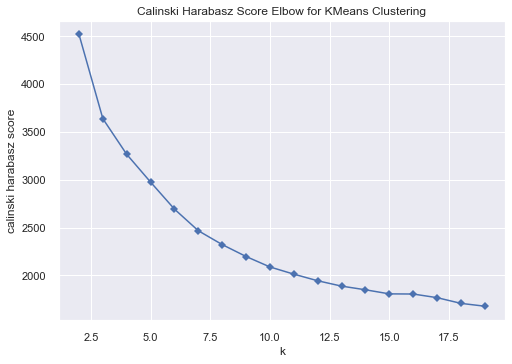

In [25]:
# Calinski Harabasz Score for K means
visualizer = KElbowVisualizer(model, k=(2,20),metric='calinski_harabasz', timings= False)
visualizer.fit(X.toarray())        
visualizer.poof();

## 3. Four fragrance clusters

Typically, fragrances are categorized into four main families:
1. Floral;
2. Oriental;
3. Woody; 
4. Fresh.

In [42]:
# cluster fragrances
model4 = KMeans(n_clusters=4, init='k-means++', max_iter=200, n_init=10)
model4.fit(X)

KMeans(max_iter=200, n_clusters=4)

In [47]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model4.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,4):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :8]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: fruity sweet powdery floral woody musky rose citrus
Cluster 1: warm spicy balsamic woody aromatic fresh citrus amber
Cluster 2: fresh aromatic spicy citrus green woody floral herbal
Cluster 3: floral white citrus sweet woody fruity musky powdery


Cluster 0 corresponds with the Fresh family <br>
Cluster 1 corresponds with the Oriental family <br>
Cluster 2 corresponds with the Woody family <br>
Cluster 3 corresponds with the Floral family <br>

In [53]:
# add a column with the cluster assignment
result2=result.copy()
result2['cluster4'] = model4.labels_
result2.head(10)

,brand,title,date,gender,accords_,cluster4
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky",0
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",0
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",0
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,"powdery,fresh spicy,aromatic,woody,leather",2
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,"white floral,rose,oud,soft spicy,fresh spicy",1
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,"woody,aromatic,fresh spicy,green,fresh",2
8,Blackbird,Targa Blackbird for women and men,2015,women,"balsamic,woody,smoky,fresh spicy,warm spicy",1
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,"herbal,aromatic,musky,fresh spicy,warm spicy",1


In [72]:
# ordinal features mapping
cluster_mapping4 = {
    0: 'Fresh',
    1: 'Oriental',
    2: 'Woody',
    3: 'Floral'}

result2['cluster_name4'] = result2['cluster4'].map(cluster_mapping4)
result2.head()

,brand,title,date,gender,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky",0,Fresh,4,Woody,0,Gourmand
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",0,Fresh,4,Woody,4,Spicy
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",0,Fresh,0,Fruity,4,Spicy
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3,Floral,5,Citrus,2,Citrus
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1,Oriental,4,Woody,3,Floral


In [55]:
# cluster count
result2['cluster_name4'].value_counts()

Fresh       18440
Woody       11370
Floral      11132
Oriental    10270
Name: cluster_name4, dtype: int64

## 4. Six fragrance clusters

There are six basic fragrance categories: 
1. Woody; 
2. Citrus; 
3. Floral; 
4. Fruity; 
5. Spicy/oriental;
6. Aquatic.

In [32]:
# cluster fragrances
model6 = KMeans(n_clusters=6, init='k-means++', max_iter=200, n_init=10)
model6.fit(X)

KMeans(max_iter=200, n_clusters=6)

In [33]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model6.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,6):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :8]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: fruity sweet floral woody citrus musky rose fresh
Cluster 1: fresh aromatic spicy green citrus woody floral herbal
Cluster 2: warm spicy balsamic woody aromatic fresh citrus patchouli
Cluster 3: powdery floral woody vanilla sweet citrus fruity musky
Cluster 4: amber balsamic woody musky spicy animalic floral warm
Cluster 5: floral white citrus sweet fruity woody musky green


Cluster 0 corresponds with the Fruity family <br>
Cluster 1 corresponds with the Aquatic family <br>
Cluster 2 corresponds with the Spicy/Oriental family <br>
Cluster 3 corresponds with the Floral family <br>
Cluster 4 corresponds with the Woody family <br>
Cluster 5 corresponds with the Citrus family <br>

In [58]:
# add a column with the cluster assignment
result2['cluster6'] = model6.labels_
result2.head(10)

,brand,title,date,gender,accords_,cluster4,cluster_name4,cluster6
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky",0,Fresh,4
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",0,Fresh,4
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",0,Fresh,0
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3,Floral,5
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1,Oriental,4
5,Xyrena,Aaliyah Xyrena for women and men,2015,women,"powdery,fresh spicy,aromatic,woody,leather",2,Woody,1
6,Al-Jazeera-Perfumes,AAA Al-Jazeera Perfumes for women and men,0,women,"white floral,rose,oud,soft spicy,fresh spicy",1,Oriental,2
7,source-adage-NYC,c’i'aan source adage NYC for women and men,2016,women,"woody,aromatic,fresh spicy,green,fresh",2,Woody,1
8,Blackbird,Targa Blackbird for women and men,2015,women,"balsamic,woody,smoky,fresh spicy,warm spicy",1,Oriental,2
9,Blackbird,Broken Glass Blackbird for women and men,2015,women,"herbal,aromatic,musky,fresh spicy,warm spicy",1,Oriental,2


In [76]:
# ordinal features mapping
cluster_mapping6 = {
    0: 'Fruity',
    1: 'Aquatic',
    2: 'Spicy/Oriental',
    3: 'Floral',
    4: 'Woody',
    5: 'Citrus'}

result2['cluster_name6'] = result2['cluster6'].map(cluster_mapping6)
result2.head()

,brand,title,date,gender,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky",0,Fresh,4,Woody,0,Gourmand
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",0,Fresh,4,Woody,4,Spicy
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",0,Fresh,0,Fruity,4,Spicy
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3,Floral,5,Citrus,2,Citrus
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1,Oriental,4,Woody,3,Floral


In [60]:
# cluster count
result2['cluster_name6'].value_counts()

Fruity            11709
Aquatic            9895
Citrus             8718
Spicy/Oriental     8676
Floral             6794
Woody              5420
Name: cluster_name6, dtype: int64

## 5. Seven fragrance clusters

Seven basic fragrance categories: 
1. Gourmand;
2. Fruity;
3. Citrus;
4. Floral;
5. Spicy;
6. Aquatic;
7. Amber;

In [64]:
# cluster fragrances
model7 = KMeans(n_clusters=7, init='k-means++', max_iter=200, n_init=10)
model7.fit(X)

KMeans(max_iter=200, n_clusters=7)

In [65]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model7.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,7):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :8]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: powdery woody balsamic musky floral amber vanilla sweet
Cluster 1: fresh aromatic spicy citrus green woody floral balsamic
Cluster 2: floral white citrus woody sweet powdery animalic musky
Cluster 3: warm spicy balsamic woody aromatic fresh amber patchouli
Cluster 4: rose floral citrus fruity musky woody powdery white
Cluster 5: fruity sweet floral woody citrus fresh vanilla powdery
Cluster 6: herbal aromatic spicy fresh woody citrus green floral


Cluster 0 corresponds with the Gourmand family <br>
Cluster 1 corresponds with the Fruity family <br>
Cluster 2 corresponds with the Citrus family <br>
Cluster 3 corresponds with the Floral family <br>
Cluster 4 corresponds with the Spicy family <br>
Cluster 5 corresponds with the Aquatic family <br>
Cluster 6 corresponds with the Amber family

In [70]:
# add a column with the cluster assignment
result2['cluster7'] = model7.labels_
result2.head()

,brand,title,date,gender,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky",0,Fresh,4,Woody,0,Gourmand
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",0,Fresh,4,Woody,4,Spicy
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",0,Fresh,0,Fruity,4,Spicy
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3,Floral,5,Citrus,2,Citrus
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1,Oriental,4,Woody,3,Floral


In [77]:
# ordinal features mapping
cluster_mapping7 = {
    0: 'Gourmand',
    1: 'Fruity',
    2: 'Citrus',
    3: 'Floral',
    4: 'Spicy',
    5: 'Aquatic',
    6: 'Amber'}

result2['cluster_name7'] = result2['cluster7'].map(cluster_mapping7)
result2.head()

,brand,title,date,gender,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky",0,Fresh,4,Woody,0,Gourmand
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",0,Fresh,4,Woody,4,Spicy
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",0,Fresh,0,Fruity,4,Spicy
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3,Floral,5,Citrus,2,Citrus
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1,Oriental,4,Woody,3,Floral


## 6. Eight fragrance clusters

Different types of fragrances:
1. Floral;
2. Citrus;
3. Woody;
4. Oriental;
5. Fruity;
6. Green;
7. Oceanic;
8. Spicy.

In [34]:
# cluster fragrances
model8 = KMeans(n_clusters=8, init='k-means++', max_iter=200, n_init=10)
model8.fit(X)

KMeans(max_iter=200)

In [35]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model8.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,8):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :8]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: woody musky amber aquatic green aromatic pictures ozonic
Cluster 1: fresh aromatic spicy citrus green woody floral herbal
Cluster 2: fruity sweet floral citrus woody vanilla tropical fresh
Cluster 3: rose floral citrus fruity musky woody powdery white
Cluster 4: floral white citrus woody sweet animalic musky green
Cluster 5: smoky balsamic spicy warm leather woody amber aromatic
Cluster 6: warm spicy balsamic woody aromatic fresh citrus patchouli
Cluster 7: powdery floral woody vanilla balsamic musky citrus sweet


Cluster 0 corresponds with the Woody family <br>
Cluster 1 corresponds with the Oceanic family <br>
Cluster 2 corresponds with the Fruity family <br>
Cluster 3 corresponds with the Floral family <br>
Cluster 4 corresponds with the Citrus family <br>
Cluster 5 corresponds with the Oriental family <br>
Cluster 6 corresponds with the Spicy family <br>
Cluster 7 corresponds with the Green family

In [79]:
# add a column with the cluster assignment
result2['cluster8'] = model8.labels_
result2.head()

,brand,title,date,gender,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7,cluster8
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky",0,Fresh,4,Woody,0,Gourmand,0
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",0,Fresh,4,Woody,4,Spicy,3
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",0,Fresh,0,Fruity,4,Spicy,3
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3,Floral,5,Citrus,2,Citrus,4
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1,Oriental,4,Woody,3,Floral,6


In [80]:
# ordinal features mapping
cluster_mapping8 = {
    0: 'Woody',
    1: 'Oceanic',
    2: 'Fruity',
    3: 'Floral',
    4: 'Citrus',
    5: 'Oriental',
    6: 'Spicy',
    7: 'Green'}

result2['cluster_name8'] = result2['cluster8'].map(cluster_mapping8)
result2.head()

,brand,title,date,gender,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7,cluster8,cluster_name8
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky",0,Fresh,4,Woody,0,Gourmand,0,Woody
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",0,Fresh,4,Woody,4,Spicy,3,Floral
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",0,Fresh,0,Fruity,4,Spicy,3,Floral
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3,Floral,5,Citrus,2,Citrus,4,Citrus
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1,Oriental,4,Woody,3,Floral,6,Spicy


## 7. Fourteen fragrance clusters

In [36]:
# cluster fragrances
model14 = KMeans(n_clusters=14, init='k-means++', max_iter=200, n_init=10)
model14.fit(X)

KMeans(max_iter=200, n_clusters=14)

In [37]:
# print top terms per cluster
print('Top terms per cluster:')

order_centroids = model14.cluster_centers_.argsort()[:, ::-1]

terms = vectorizer.get_feature_names()

for i in range(0,14):
    print('Cluster %d:' % i, end='')
    for ind in order_centroids[i, :8]:
        print(' %s' % terms[ind], end='')
    print() 

Top terms per cluster:
Cluster 0: tropical fruity sweet floral fresh citrus woody white
Cluster 1: fresh aromatic spicy green citrus woody floral musky
Cluster 2: fruity sweet woody musky floral citrus pictures green
Cluster 3: animalic floral white amber leather tuberose musky woody
Cluster 4: powdery woody floral balsamic musky citrus fruity sweet
Cluster 5: spicy warm balsamic woody aromatic fresh amber citrus
Cluster 6: vanilla sweet powdery floral fruity white woody citrus
Cluster 7: rose floral citrus woody musky fruity powdery fresh
Cluster 8: floral white citrus woody sweet fruity musky green
Cluster 9: yellow floral sweet white woody powdery citrus green
Cluster 10: herbal aromatic spicy fresh woody citrus green floral
Cluster 11: earthy woody aromatic green spicy citrus fresh floral
Cluster 12: patchouli warm spicy balsamic rose citrus floral woody
Cluster 13: aquatic ozonic floral fresh fruity green citrus woody


Cluster 0 corresponds with the Citrus family <br>
Cluster 1 corresponds with the Green family <br>
Cluster 2 corresponds with the Fruity family <br>
Cluster 3 corresponds with the Dry woods family <br>
Cluster 4 corresponds with the Floral oriental family <br>
Cluster 5 corresponds with the Woods family <br>
Cluster 6 corresponds with the Oriental family <br>
Cluster 7 corresponds with the Floral family <br>
Cluster 8 corresponds with the Soft oriental family <br>
Cluster 9 corresponds with the Soft floral family <br>
Cluster 10 corresponds with the Aromatic family <br>
Cluster 11 corresponds with the Mossy woods family <br>
Cluster 12 corresponds with the Woody oriental family <br>
Cluster 13 corresponds with the Water family

The floral fragrance family 
- Fruity: Sweet, edible and tropical like peach, pear and apple.
- Floral: Smells like fresh-cut flowers — imagine rose and lily.
- Soft floral: Soft, powdery and sweet with a hint of creamy.
- Floral oriental: Florals with subtle spice notes.

The oriental fragrance family
- Soft oriental: Soft, floral notes mix with incense and warm spices.
- Oriental: Sweet, warm notes like cinnamon, vanilla and musk.
- Woody oriental: Earthy notes like patchouli and sandalwood mixed with spicy and sweet notes.

The woody fragrance family:
- Woods: Aromatic scents like cedarwood, sandalwood and vetiver.
- Mossy woods: Sweet, smooth and earthy scents like oakmoss and amber.
- Dry woods: Smouldering and smoky mixed with leather aromas.

The fresh fragrance family:
- Aromatic: Clean and fresh herbs mixed with lavender or woody scents.
- Citrus: Zesty or tangy notes like mandarins or bergamot.
- Water: Aquatic scents that smell of sea spray or rain mixed with or oceanic notes.
- Green: Smells of freshly mowed lawns and crushed green leaves.

In [81]:
# add a column with the cluster assignment
result2['cluster14'] = model14.labels_
result2.head()

,brand,title,date,gender,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7,cluster8,cluster_name8,cluster14
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky",0,Fresh,4,Woody,0,Gourmand,0,Woody,3
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",0,Fresh,4,Woody,4,Spicy,3,Floral,7
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",0,Fresh,0,Fruity,4,Spicy,3,Floral,7
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3,Floral,5,Citrus,2,Citrus,4,Citrus,3
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1,Oriental,4,Woody,3,Floral,6,Spicy,5


In [82]:
# ordinal features mapping
cluster_mapping14 = {
    0: 'Citrus',
    1: 'Green',
    2: 'Fruity',
    3: 'Dry woods ',
    4: 'Floral oriental',
    5: 'Woods',
    6: 'Oriental',
    7: 'Floral',
    8: 'Soft oriental',
    9: 'Soft floral',
    10: 'Aromatic',
    11: 'Mossy woods',
    12: 'Woody oriental',
    12: 'Water'}

result2['cluster_name14'] = result2['cluster14'].map(cluster_mapping14)
result2.head()

,brand,title,date,gender,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7,cluster8,cluster_name8,cluster14,cluster_name14
0,The-Spirit-of-Dubai,Aamal The Spirit of Dubai for women and men,2017,women,"woody,earthy,animalic,amber,musky",0,Fresh,4,Woody,0,Gourmand,0,Woody,3,Dry woods
1,Ajmal,Aatifa Ajmal for women and men,2014,women,"fresh spicy,woody,musky,rose,amber",0,Fresh,4,Woody,4,Spicy,3,Floral,7,Floral
2,Al-Jazeera-Perfumes,AA Al-Jazeera Perfumes for women and men,0,women,"rose,woody,musky,oud,fruity",0,Fresh,0,Fruity,4,Spicy,3,Floral,7,Floral
3,Art-of-Scent-Swiss-Perfumes,aarewasser Art of Scent - Swiss Perfumes for women and men,2010,women,"white floral,green,ozonic,fresh,animalic",3,Floral,5,Citrus,2,Citrus,4,Citrus,3,Dry woods
4,Hamidi-Oud-Perfumes,Aaliyah Hamidi Oud & Perfumes for women and men,0,women,"woody,warm spicy,amber,balsamic,musky",1,Oriental,4,Woody,3,Floral,6,Spicy,5,Woods


In [83]:
result2.loc[result2['brand']=='Chanel'].head()

,brand,title,date,gender,accords_,cluster4,cluster_name4,cluster6,cluster_name6,cluster7,cluster_name7,cluster8,cluster_name8,cluster14,cluster_name14
1881,Chanel,Chance Parfum Chanel for women,2003,women,"powdery,white floral,vanilla,musky,floral",3,Floral,3,Floral,2,Citrus,7,Green,6,Oriental
3620,Chanel,Chance Eau Tendre Chanel for women,2010,women,"floral,fruity,citrus,sweet,fresh spicy",0,Fresh,0,Fruity,5,Aquatic,2,Fruity,2,Fruity
3623,Chanel,Chance Eau de Toilette Chanel for women,2003,women,"patchouli,green,citrus,sweet,earthy",0,Fresh,0,Fruity,0,Gourmand,0,Woody,11,Mossy woods
3635,Chanel,Chanel N°5 Eau Premiere Chanel for women,2007,women,"woody,aldehydic,white floral,yellow floral,vanilla",3,Floral,5,Citrus,2,Citrus,4,Citrus,9,Soft floral
3642,Chanel,Allure Homme Edition Blanche Chanel for men,2008,NaN,"citrus,aromatic,woody,green,vanilla",2,Woody,1,Aquatic,1,Fruity,1,Oceanic,1,Green


In [88]:
# TO DO LIST
# display fragrances with the highest notes as representatives per each cluster for better insights
# run hierarchical clustering algorithm, display dendrograms

## 8. Hierarchical clustering